In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


### 1、Linear regression with one variable¶

In [30]:
col =np.loadtxt('data/ex1data1.txt',usecols=None,delimiter=",",unpack=True) 
#参数1是文件路径 ，参数2是选择列数  delimiter是指分割符号  unpack  是否转置
X = np.transpose(np.array(col[:-1]))
Y = np.transpose(np.array(col[1:]))
m= Y.size
X =np.insert(X,0,1,axis=1) #axis =1 为列    在X的第0列插入1
#numpy.insert(arr,obj,value,axis=None)
#同理，value为插入的数值
#arr:为目标向量
#obj:为目标位置
#value:为想要插入的数值
#axis:为插入的维度

###  Plotting the Data

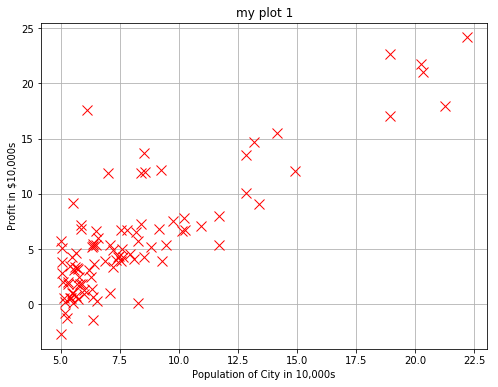

In [62]:
plt.figure(figsize=(8,6))

plt.plot(X[:,1],Y,'rx',markersize=10)#X向量的第一列  和Y向量    rx是指红色  x   b.是指蓝色 .   markersize设置符号的大小
plt.grid(True)#加网格线
plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")
plt.title("my plot 1")
plt.show()

#### 2.2 Gradient Descent

In [114]:
alpha = 0.01
iterations = 1500

In [180]:
def h(theta,X): #定义假设函数
    return np.dot(X,theta)

def computeCost(theta,X,Y): #定义损失函数
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(theta,X)-Y).T,(h(theta,X)-Y)))

initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,Y)

32.07273387745567

In [108]:
#定义梯度下降函数
def desentGradent(X,Y,iterations,theta_start=np.zeros(2)):
    """
        构造梯度下降函数
    """
    theta =  theta_start
    jvec = [] #存储每次循环后损失函数的值  ，观察其是否下降
    thetahistory = [] #
    for meaninglessvariable in range(iterations):
        temtheta = theta
        jvec.append(computeCost(theta,X,Y))
        thetahistory.append(list(temtheta[:,0]))
        
        for j in range(len(temtheta)):
            temtheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X)-Y)*np.array(X[:,j]).reshape(m,1))
        theta = temtheta
    return theta , jvec , thetahistory

### 画出损失函数的变化曲线

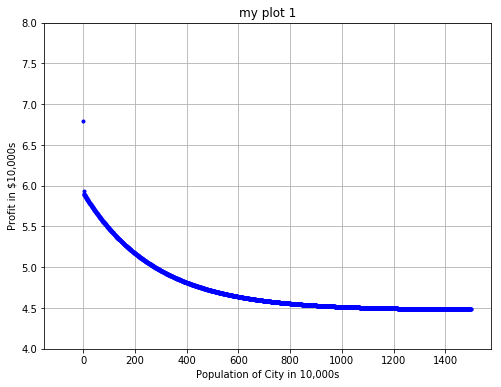

In [147]:
initial_theta = np.zeros((X.shape[1],1))
theta,jvec,thetahistory = desentGradent(X,Y,iterations,initial_theta) 

def plotConvergence(jvec):
    plt.figure(figsize=(8,6))

    plt.plot(range(len(jvec)),jvec,'b.')#X向量的第一列  和Y向量    rx是指红色  x   b.是指蓝色 .   markersize设置符号的大小
    plt.grid(True)#加网格线
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel("Profit in $10,000s")
    plt.title("my plot 1")
    dummy = plt.xlim([-0.1*iterations,1.05*iterations])
    #plt.ylim([4,7]) #设置y轴坐标的范围  xlim  设置x轴的坐标范围

plotConvergence(jvec)
dummy = plt.ylim([4,8])

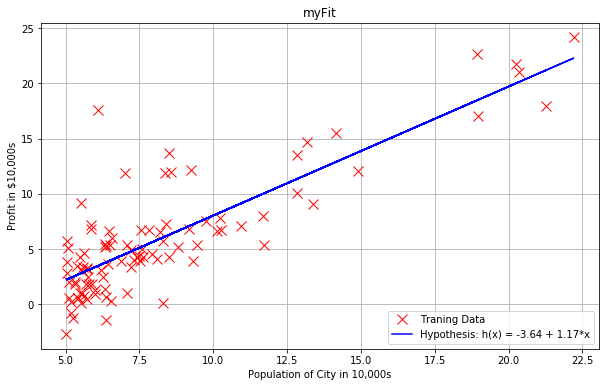

In [186]:
def myfit(theta,x):
    return theta[0]+theta[1]*x
plt.figure(figsize=(10,6))

plt.plot(X[:,1],Y,'rx',label="Traning Data",markersize=10)#X向量的第一列  和Y向量    rx是指红色  x   b.是指蓝色 .   markersize设置符号的大小
plt.plot(X[:,1],myfit(theta,X[:,1]),'b-',label="Hypothesis: h(x) = %0.2f + %0.2f*x"%(theta[0],theta[1]))
plt.grid(True)#加网格线
plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")
plt.title("myFit")
plt.legend(loc="lower right")
plt.show()

#### 2.4 Visualizing _J($\theta$)$\theta\$

In [184]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

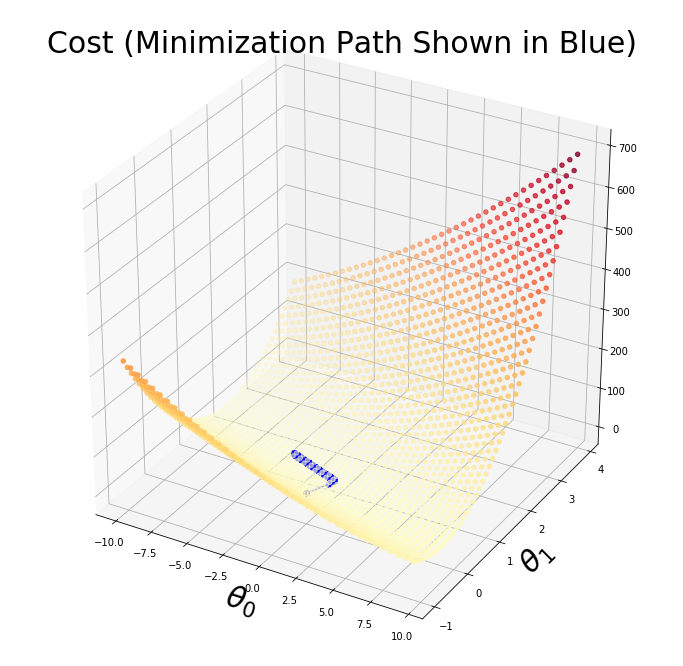

In [194]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

yvals = np.arange(-1,4,.1)
xvals = np.arange(-10,10,.5)
myx,myy,myz = [],[],[]
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,Y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()